In [ ]:
import yfinance as yf
#documentation: https://github.com/ranaroussi/yfinance


msft = yf.Ticker("MSFT")
baba = yf.Ticker("BABA")
aapl = yf.Ticker("AAPL")
fb = yf.Ticker("FB")
amzn = yf.Ticker("AMZN")
goog = yf.Ticker("GOOG")

print(msft)
"""
returns
<yfinance.Ticker object at 0x1a1715e898>
"""

In [ ]:
#get stock info
msft.info

In [ ]:
msft.history(period="yesterday")

In [ ]:
msft.history(period="now")

In [ ]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("MSFT GOOG AAPL AMZN FB BABA", period="now")

In [29]:
import datetime as dt
from datetime import timedelta
from datetime import date

end = date.today()
start = end - timedelta(days=20)


df = pdr.get_data_yahoo("MSFT GOOG AAPL AMZN FB BABA", start, end)

df_Close = df['Close']

df_Close

#to get range
#dt_Close.loc['2019-11-25':'2019-11-28']

NameError: name 'pdr' is not defined

In [ ]:
import matplotlib.pyplot as plt

#%matplotlib inline
# Plot the close price of the AAPL
df_Close.plot()

In [ ]:
#saves plots to local folder
companies = []

for i in df_Close:
    companies.append(i)
    
c=0
    
for i in companies:
    plt.clf()
    df_Close[i].plot(title = i)
    savename = i+"_plot.png"
    #plt.savefig(savename)

In [ ]:
df_Close.plot(subplots=True)

In [ ]:
#calculating the moving average

end = date.today()
start = end - timedelta(days=100)

msft_df = pdr.get_data_yahoo("MSFT", start, end)


close_px = msft_df['Adj Close']
mavg = close_px.rolling(window=10).mean()

mavg

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='MSFT')
mavg.plot(label='mavg')
plt.legend()

# Returns biggest losers and gainers

In [2]:
#Getting biggest gainers for the day

#!/usr/bin/env python
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):

    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = "https://financialmodelingprep.com/api/v3/stock/gainers"
gainers = get_jsonparsed_data(url)

In [3]:
#and biggest losers

#!/usr/bin/env python
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):

    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/stock/losers")
losers = get_jsonparsed_data(url)

In [4]:
print("############BIGGEST LOSERS##############")

for loser in losers["mostLoserStock"]:
        print(loser["ticker"])
        print(str(loser["changes"]))
        
print("############BIGGEST GAINERS##############")        
        
for gainer in gainers["mostGainerStock"]:
        print(gainer["ticker"])
        print(str(gainer["changes"]))

############BIGGEST LOSERS##############
SEB
-23.16
GHC
-3.76
NWLI
-2.98
AZO
-2.89
MKTX
-2.49
NEU
-2.38
FCNCA
-1.67
CABO
-1.56
SHW
-1.49
LGND
-1.41
############BIGGEST GAINER##############
NVR
15.03
WTM
8.31
TPL
8.06
RUSL
5.75
CSGP
3.54
FLRU
3.15
TSLA
1.59
IAC
1.41
AE
1.35
MSG
1.33


# Creates graphs for the biggest losers and gainers

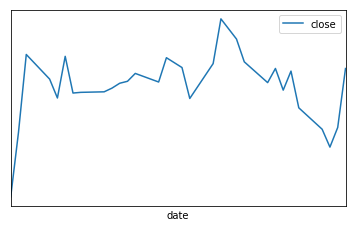

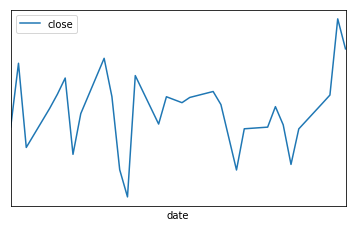

In [36]:
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import date


#remove if added to other code
today = str(date.today())


#names of biggest loser and gainer companies
loser = next(iter(losers.values()))[0].get('ticker')
gainer = next(iter(gainers.values()))[0].get('ticker')

#creates urls to access historical data of respective companies
loser_url = ("https://financialmodelingprep.com/api/v3/historical-price-full/"+ loser +"?timeseries=30")
gainer_url = ("https://financialmodelingprep.com/api/v3/historical-price-full/"+ gainer +"?timeseries=30")
names = ["loser", "gainer"]
c = 0

#creates respective graphs for the close values of the last 30 days of the companies and saves it as png
for i in loser_url, gainer_url:
    response = urlopen(i)
    data = response.read()
    hist = json.loads(data)
    hist.get("historical")
    df = pd.DataFrame(hist.get("historical"))
    df["date"] = pd.to_datetime(df["date"])
    df = df[["date","close"]].copy()
    df.set_index('date', inplace=True)
    df.plot()
    #uncomment next two rows if you dont want axes included in the graph
    #fig = plt.yticks([])
    #fig = plt.xticks([])
    fig = plt.gcf()
    savename = today + "_" + names[c] + "_plot.png"
    fig.savefig(savename, bbox_inches='tight')
    c =+ 1

